In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_excel("/kaggle/input/global-terrorism-index-2023/Global Terrorism Index 2023.xlsx")

In [7]:
df.head()

,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
0,IRQ,Iraq,1,9.599967,1288,2086,5050,16,2012
1,PAK,Pakistan,2,9.152620,638,1322,2297,160,2012
2,AFG,Afghanistan,3,9.134265,507,1511,2612,67,2012
3,SYR,Syria,4,8.238079,168,1014,1833,71,2012
4,YEM,Yemen,5,8.098513,219,651,798,121,2012


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from datetime import date
import folium

In [9]:
df.columns

Index(['iso3c', 'Country', 'Rank', 'Score', 'Incidents', 'Fatalities',
       'Injuries', 'Hostages', 'Year'],
      dtype='object')

In [10]:
df.isnull().sum()

iso3c         0
Country       0
Rank          0
Score         0
Incidents     0
Fatalities    0
Injuries      0
Hostages      0
Year          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1793 entries, 0 to 1792
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   iso3c       1793 non-null   object 
 1   Country     1793 non-null   object 
 2   Rank        1793 non-null   int64  
 3   Score       1793 non-null   float64
 4   Incidents   1793 non-null   int64  
 5   Fatalities  1793 non-null   int64  
 6   Injuries    1793 non-null   int64  
 7   Hostages    1793 non-null   int64  
 8   Year        1793 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 126.2+ KB


In [12]:
df.columns.value_counts()

iso3c         1
Country       1
Rank          1
Score         1
Incidents     1
Fatalities    1
Injuries      1
Hostages      1
Year          1
Name: count, dtype: int64

In [13]:
df.describe()

,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
count,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.00000
mean,71.691578,2.442817,26.699944,53.537646,74.588957,10.149470,2017.00000
std,35.235705,2.654876,109.500965,253.912698,415.669549,82.306937,3.16316
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.00000
25%,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.00000
50%,82.000000,1.534965,0.000000,0.000000,0.000000,0.000000,2017.00000
75%,106.000000,4.419243,4.000000,2.000000,4.000000,0.000000,2020.00000
max,112.000000,10.000000,1673.000000,4514.000000,9479.000000,2727.000000,2022.00000


In [14]:
df.sample(5)

,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
46,KAZ,Kazakhstan,47,3.956175,1,0,1,0,2012
310,MKD,Macedonia (FYR),110,0.000000,0,0,0,0,2013
793,LBR,Liberia,106,0.000000,0,0,0,0,2016
1530,PRY,Paraguay,64,2.148928,0,0,0,0,2021
45,MAR,Morocco,45,4.027997,0,0,0,0,2012


In [15]:
df[df['Country']=='Algeria']

,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
13,DZA,Algeria,14,6.695682,41,43,135,1,2012
178,DZA,Algeria,16,6.476254,13,46,26,107,2013
345,DZA,Algeria,20,6.129568,10,33,0,0,2014
514,DZA,Algeria,26,5.794741,12,22,14,0,2015
683,DZA,Algeria,32,5.345504,6,11,11,0,2016
851,DZA,Algeria,37,5.032906,8,7,16,0,2017
1013,DZA,Algeria,36,5.113016,8,18,15,0,2018
1179,DZA,Algeria,39,4.751069,7,2,17,17,2019
1346,DZA,Algeria,43,4.326213,2,3,0,0,2020
1506,DZA,Algeria,40,4.426002,3,8,6,0,2021


In [16]:
df[df['Fatalities'] == df['Hostages']]

,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
20,NOR,Norway,21,5.574483,0,0,0,0,2012
31,BDI,Burundi,32,4.735280,0,0,0,0,2012
32,UGA,Uganda,33,4.634779,0,0,0,0,2012
35,BLR,Belarus,36,4.567116,0,0,0,0,2012
39,TJK,Tajikistan,40,4.293038,0,0,0,0,2012
...,...,...,...,...,...,...,...,...,...
1788,TKM,Turkmenistan,93,0.000000,0,0,0,0,2022
1789,TLS,Timor-Leste,93,0.000000,0,0,0,0,2022
1790,TTO,Trinidad and Tobago,93,0.000000,0,0,0,0,2022
1791,ZMB,Zambia,93,0.000000,0,0,0,0,2022


In [17]:
len(df[df['Fatalities'] == df['Hostages']])

1259

In [18]:
df[df['Incidents']== 0]

,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
20,NOR,Norway,21,5.574483,0,0,0,0,2012
31,BDI,Burundi,32,4.735280,0,0,0,0,2012
32,UGA,Uganda,33,4.634779,0,0,0,0,2012
35,BLR,Belarus,36,4.567116,0,0,0,0,2012
39,TJK,Tajikistan,40,4.293038,0,0,0,0,2012
...,...,...,...,...,...,...,...,...,...
1788,TKM,Turkmenistan,93,0.000000,0,0,0,0,2022
1789,TLS,Timor-Leste,93,0.000000,0,0,0,0,2022
1790,TTO,Trinidad and Tobago,93,0.000000,0,0,0,0,2022
1791,ZMB,Zambia,93,0.000000,0,0,0,0,2022


In [19]:
df.head(10)

,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
0,IRQ,Iraq,1,9.599967,1288,2086,5050,16,2012
1,PAK,Pakistan,2,9.152620,638,1322,2297,160,2012
2,AFG,Afghanistan,3,9.134265,507,1511,2612,67,2012
3,SYR,Syria,4,8.238079,168,1014,1833,71,2012
4,YEM,Yemen,5,8.098513,219,651,798,121,2012
5,NGA,Nigeria,6,8.098342,212,767,496,9,2012
6,SOM,Somalia,7,7.964123,166,446,427,1,2012
7,IND,India,8,7.814715,219,150,256,41,2012
8,THA,Thailand,9,7.499810,199,184,493,0,2012
9,RUS,Russia,10,7.490145,219,157,309,3,2012


In [20]:
df['Country'].unique()

array(['Iraq', 'Pakistan', 'Afghanistan', 'Syria', 'Yemen', 'Nigeria',
       'Somalia', 'India', 'Thailand', 'Russia', 'Turkey', 'Colombia',
       'Philippines', 'Algeria', 'Kenya',
       'Democratic Republic of the Congo', 'Egypt', 'Israel', 'Iran',
       'Myanmar', 'Norway', 'Mali', 'Libya', 'Sri Lanka', 'Sudan',
       'Indonesia', 'Lebanon', 'Nepal', 'Ethiopia', 'China', 'Peru',
       'Burundi', 'Uganda', 'Palestine', 'United Kingdom', 'Belarus',
       'Bangladesh', 'France', 'United States of America', 'Tajikistan',
       'Georgia', 'Bulgaria', "Cote d' Ivoire",
       'Central African Republic', 'Greece', 'Morocco', 'Kazakhstan',
       'Guatemala', 'Bahrain', 'Ukraine', 'Rwanda', 'Saudi Arabia',
       'Mauritania', 'Tunisia', 'Spain', 'Italy', 'Kosovo', 'Cameroon',
       'Germany', 'Niger', 'Eritrea', 'Mexico', 'Argentina', 'Chile',
       'Paraguay', 'El Salvador', 'Jordan', 'Serbia', 'Azerbaijan',
       'Honduras', 'Venezuela', 'Madagascar', 'Angola', 'Sierra Leone',

In [21]:
df['Incidents'].max()

1673

In [22]:
df['Fatalities'].max()

4514

In [23]:
df['Fatalities'].idxmax()

652

In [24]:
df.iloc[652]

iso3c          IRQ
Country       Iraq
Rank             1
Score         10.0
Incidents     1545
Fatalities    4514
Injuries      4514
Hostages        20
Year          2016
Name: 652, dtype: object

In [25]:
df['Country'].value_counts()[:3]

Country
Iraq       11
Vietnam    11
Oman       11
Name: count, dtype: int64

In [26]:
len(df[df['Incidents'] == 0])

1082

In [27]:
len(df[df['Fatalities'] == 0])

1269

<Axes: >

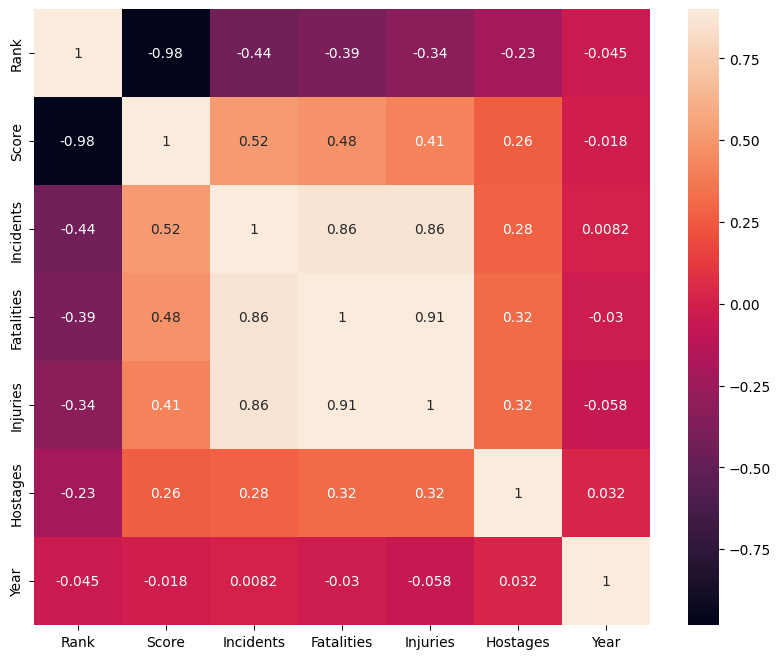

In [28]:
cm = df[['Rank', 'Score', 'Incidents', 'Fatalities', 'Injuries', 'Hostages', 'Year']].corr()
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(cm, vmax=0.9, square = True, annot = True)

In [29]:
correlation_matrix = df[['Score', 'Incidents', 'Fatalities', 'Injuries', 'Hostages']].corr()
print(correlation_matrix)

               Score  Incidents  Fatalities  Injuries  Hostages
Score       1.000000   0.516868    0.479365  0.410757  0.263119
Incidents   0.516868   1.000000    0.860467  0.863206  0.282083
Fatalities  0.479365   0.860467    1.000000  0.912888  0.318144
Injuries    0.410757   0.863206    0.912888  1.000000  0.317053
Hostages    0.263119   0.282083    0.318144  0.317053  1.000000


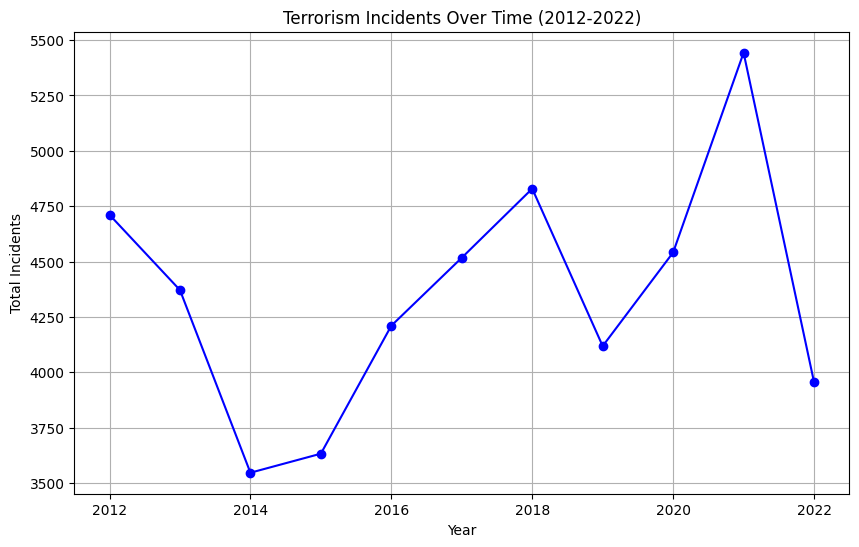

In [30]:
yearly_totals = df.groupby('Year')['Incidents'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_totals['Year'], yearly_totals['Incidents'], marker='o', linestyle='-', color='blue')
plt.title('Terrorism Incidents Over Time (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.grid(True)
plt.show()

In [31]:
total_incidents_by_country = df.groupby('Country')['Incidents'].sum().reset_index()

top_5_countries = total_incidents_by_country.sort_values(by='Incidents', ascending=False).head(5)

print(top_5_countries)

         Country  Incidents
66          Iraq      11183
0    Afghanistan       4443
109     Pakistan       3358
130      Somalia       2951
63         India       2872


In [32]:
df['Year'] = df['Year'].astype(int)

yearly_totals = df.groupby(['Year', 'Country'])['Incidents'].sum().reset_index()

pivot_table = yearly_totals.pivot(index='Country', columns='Year', values='Incidents').fillna(0)

increase = pivot_table[2022] - pivot_table[2012]

top_countries = increase.sort_values(ascending=False).head(5).index

top_countries_data = pivot_table.loc[top_countries]

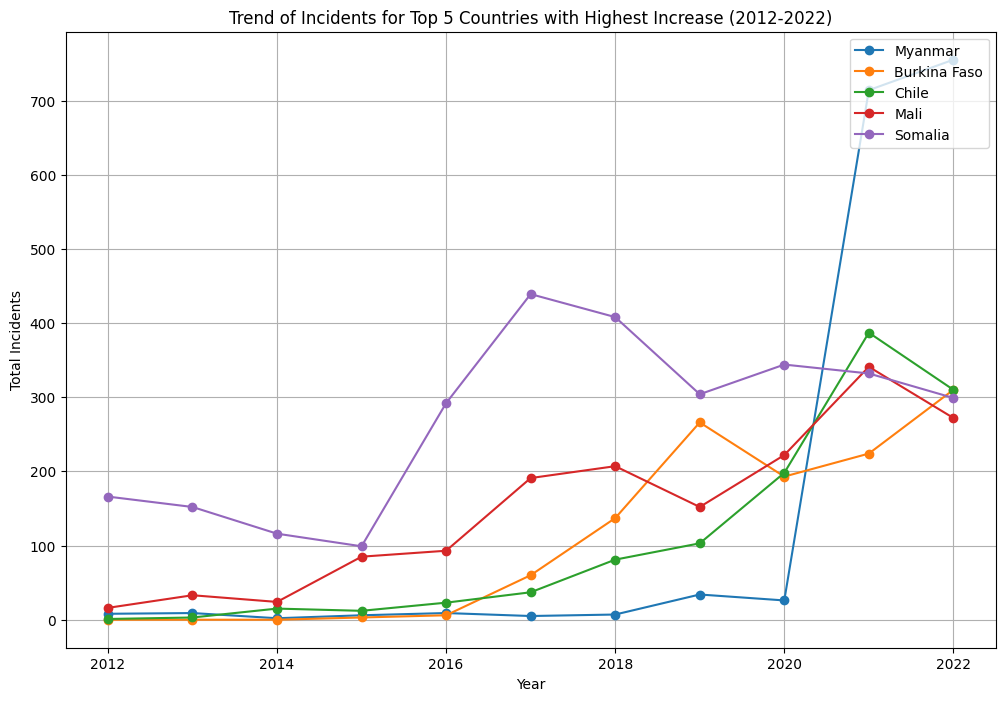

In [33]:
plt.figure(figsize=(12, 8))

for country in top_countries_data.index:
    plt.plot(top_countries_data.columns, top_countries_data.loc[country], marker='o', linestyle='-', label=country)

plt.title('Trend of Incidents for Top 5 Countries with Highest Increase (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

In [34]:
df['Year'] = df['Year'].astype(int)

yearly_totals = df.groupby(['Year', 'Country'])['Incidents'].sum().reset_index()

pivot_table = yearly_totals.pivot(index='Country', columns='Year', values='Incidents').fillna(0)

decrease = pivot_table[2012] - pivot_table[2022]

top_countries_decrease = decrease.sort_values(ascending=False).head(5).index

top_countries_decrease_data = pivot_table.loc[top_countries_decrease]

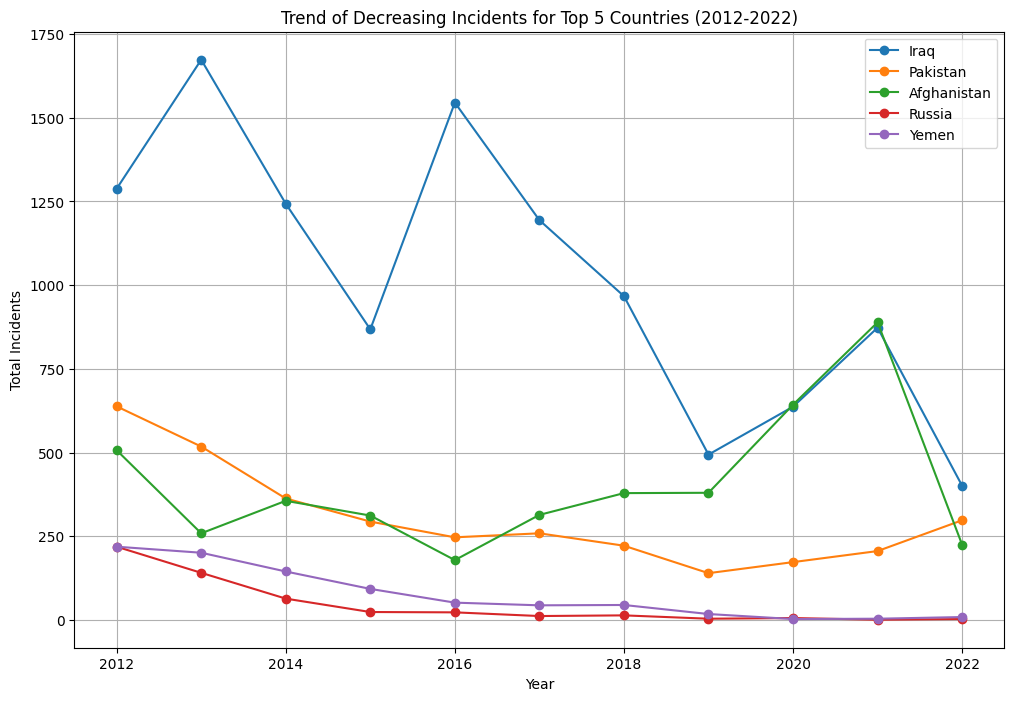

In [35]:
plt.figure(figsize=(12, 8))

for country in top_countries_decrease_data.index:
    plt.plot(top_countries_decrease_data.columns, top_countries_decrease_data.loc[country], marker='o', linestyle='-', label=country)

plt.title('Trend of Decreasing Incidents for Top 5 Countries (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

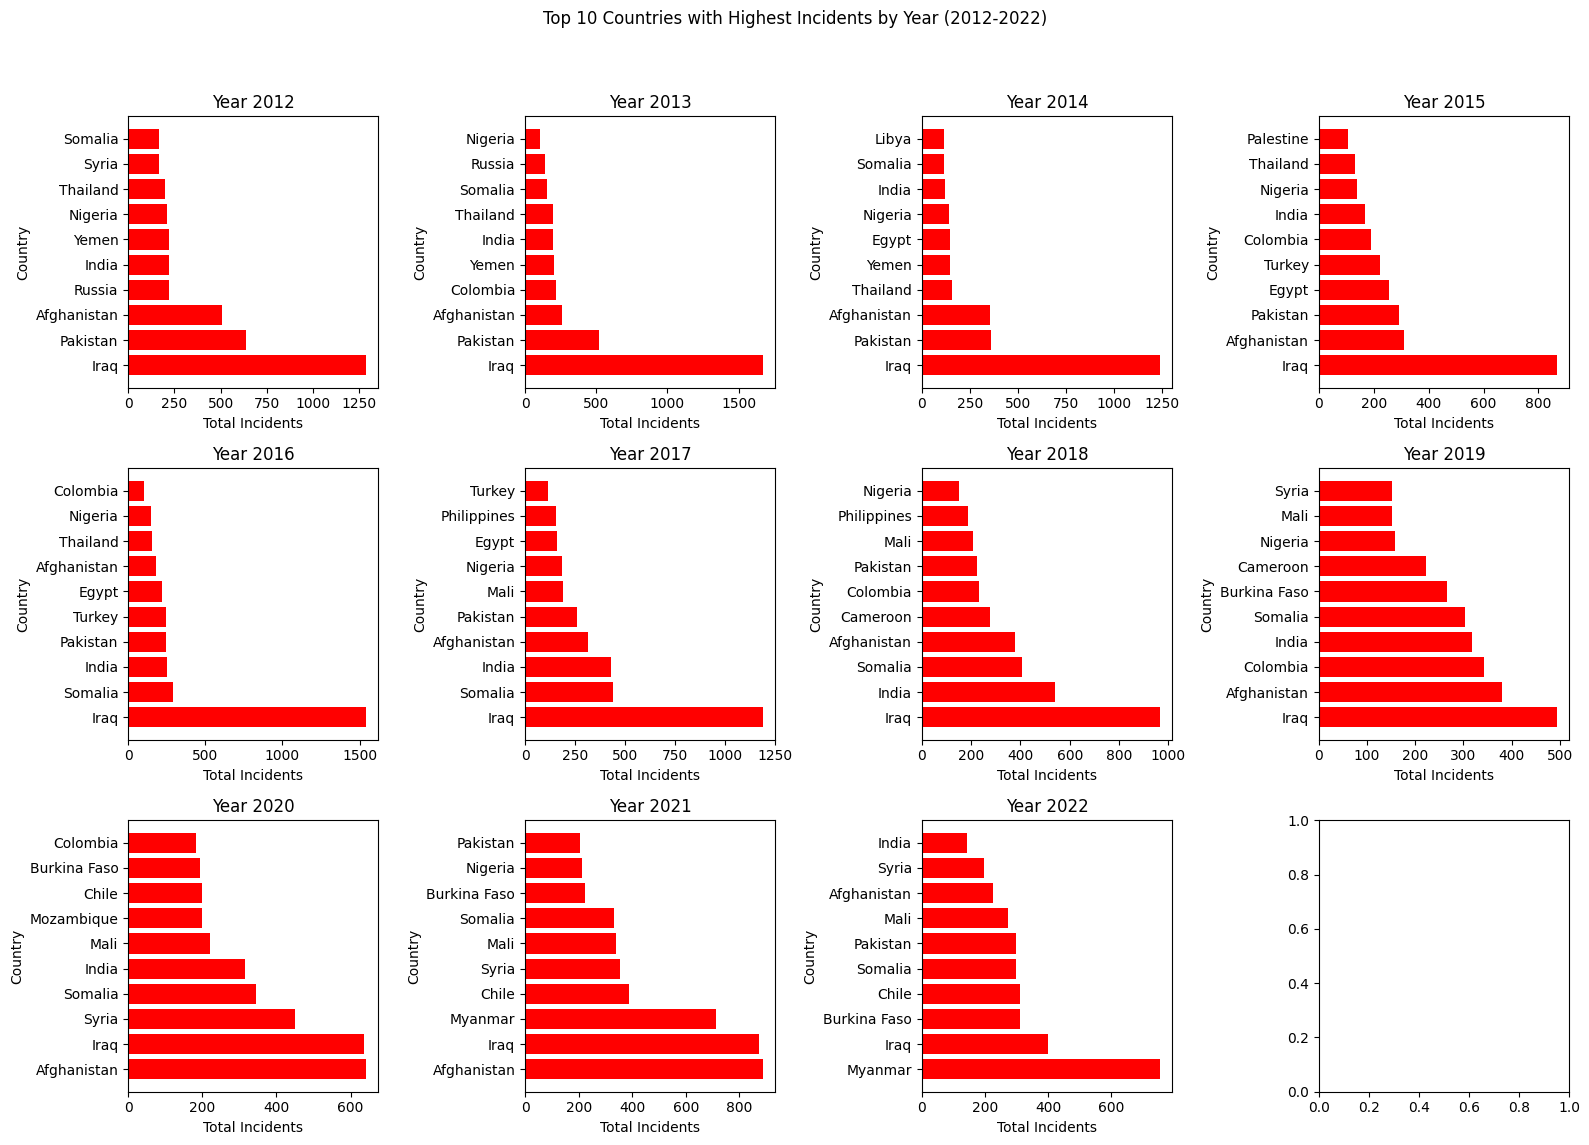

In [36]:
top_countries_by_year = pd.DataFrame(columns=['Year', 'Country', 'Incidents'])

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
fig.suptitle('Top 10 Countries with Highest Incidents by Year (2012-2022)')

for i, year in enumerate(range(2012, 2023)):
    incidents_year = df[df['Year'] == year]
    
    top_countries_year = incidents_year.groupby('Country')['Incidents'].sum().reset_index()
    
    top_10_countries_year = top_countries_year.sort_values(by='Incidents', ascending=False).head(10)

    top_10_countries_year['Year'] = year
  
    top_countries_by_year = pd.concat([top_countries_by_year, top_10_countries_year], ignore_index=True)
    
    row, col = i // 4, i % 4
    ax = axs[row, col]
    ax.barh(top_10_countries_year['Country'], top_10_countries_year['Incidents'], color='red')
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Total Incidents')
    ax.set_ylabel('Country')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# **TOP 5 YEARS WITH THE HIGHEST NO: OF TOTAL FATALITIES**

In [37]:
total_fatalities_by_year = df.groupby('Year')['Fatalities'].sum().reset_index()

top_5_years = total_fatalities_by_year.sort_values(by='Fatalities', ascending=False).head(5)

print(top_5_years)

   Year  Fatalities
3  2015       10881
4  2016       10372
1  2013       10317
2  2014       10129
0  2012        9227


# **TOP 10 COUNTRIES WITH THE HIGHEST NO: OF FATALITIES IN THE YEAR 2015**

In [38]:
fatalities_2015 = df[(df['Year'] == 2015)]

fatalities_by_country_2015 = fatalities_2015.groupby('Country')['Fatalities'].sum().reset_index()

top_10_countries_2015 = fatalities_by_country_2015.sort_values(by='Fatalities', ascending=False).head(10)

print(top_10_countries_2015)

         Country  Fatalities
66          Iraq        2974
105      Nigeria        2003
0    Afghanistan        1008
109     Pakistan         658
41         Egypt         481
160        Yemen         458
130      Somalia         335
23      Cameroon         292
149       Turkey         286
83         Libya         234


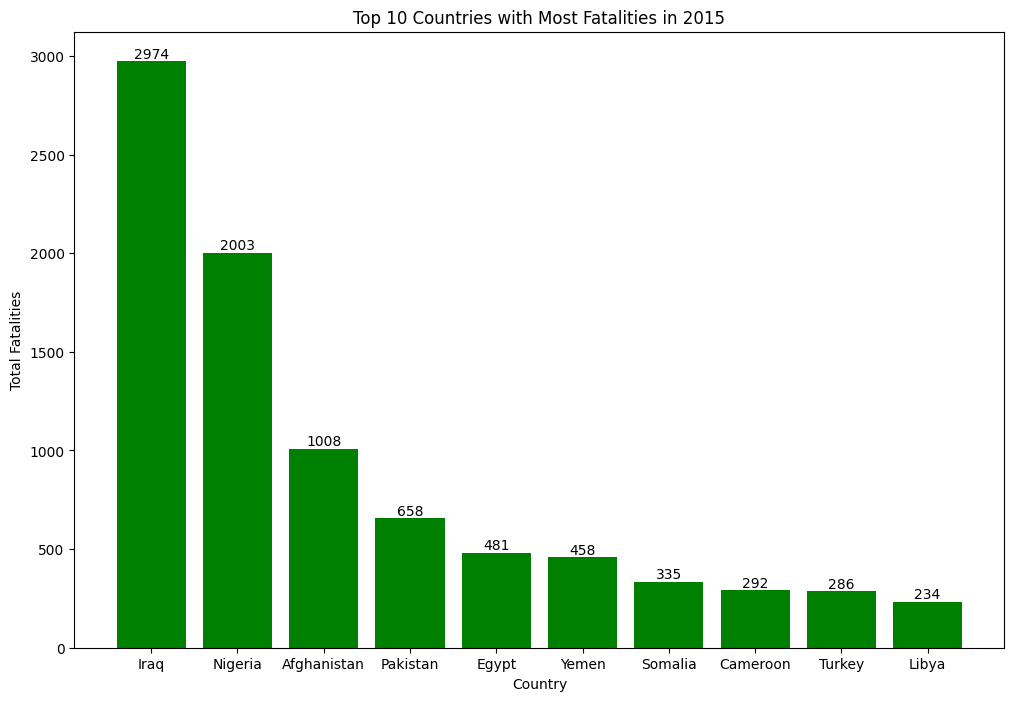

In [39]:
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_countries_2015['Country'], top_10_countries_2015['Fatalities'], color='green')

plt.title('Top 10 Countries with Most Fatalities in 2015')
plt.xlabel('Country')
plt.ylabel('Total Fatalities')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.show()

In [40]:
rank_1_data = df[df['Rank'] == 1]

rank_1_counts = rank_1_data['Country'].value_counts()

for country, count in rank_1_counts.items():
    print(f'Country: {country}, Count: {count}')

Country: Iraq, Count: 7
Country: Afghanistan, Count: 4


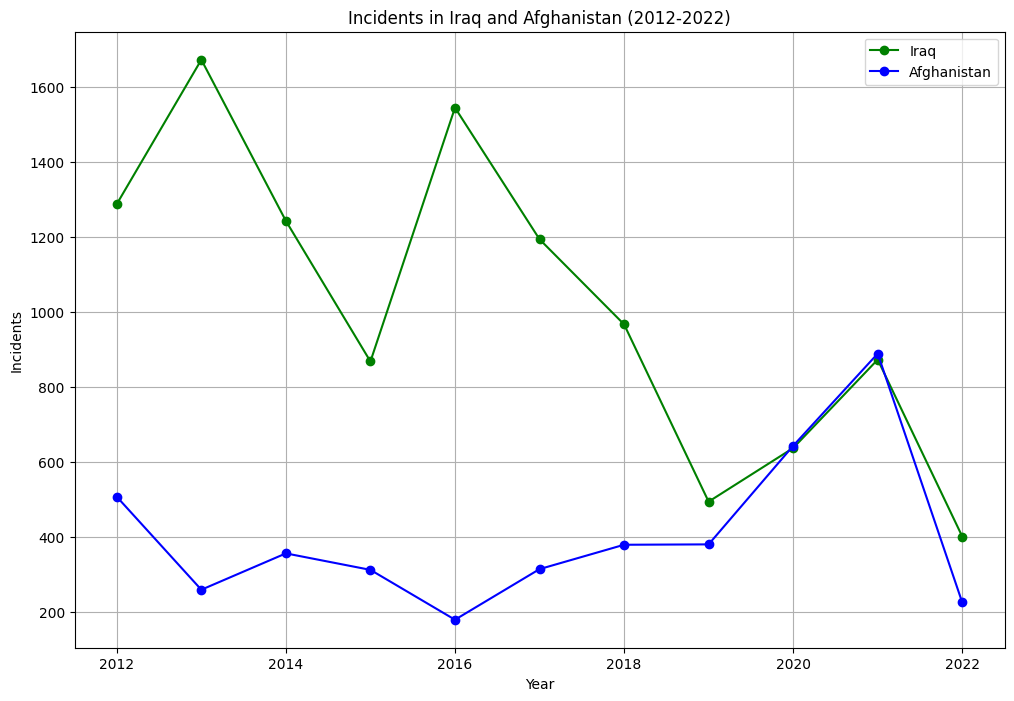

In [41]:
iraq_data = df[df['Country'] == 'Iraq']
afghanistan_data = df[df['Country'] == 'Afghanistan']

plt.figure(figsize=(12, 8))
plt.plot(iraq_data['Year'], iraq_data['Incidents'], label='Iraq', marker='o', linestyle='-', color='green')
plt.plot(afghanistan_data['Year'], afghanistan_data['Incidents'], label='Afghanistan', marker='o', linestyle='-', color='blue')

plt.title('Incidents in Iraq and Afghanistan (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Incidents')
plt.legend()
plt.grid(True)
plt.show()

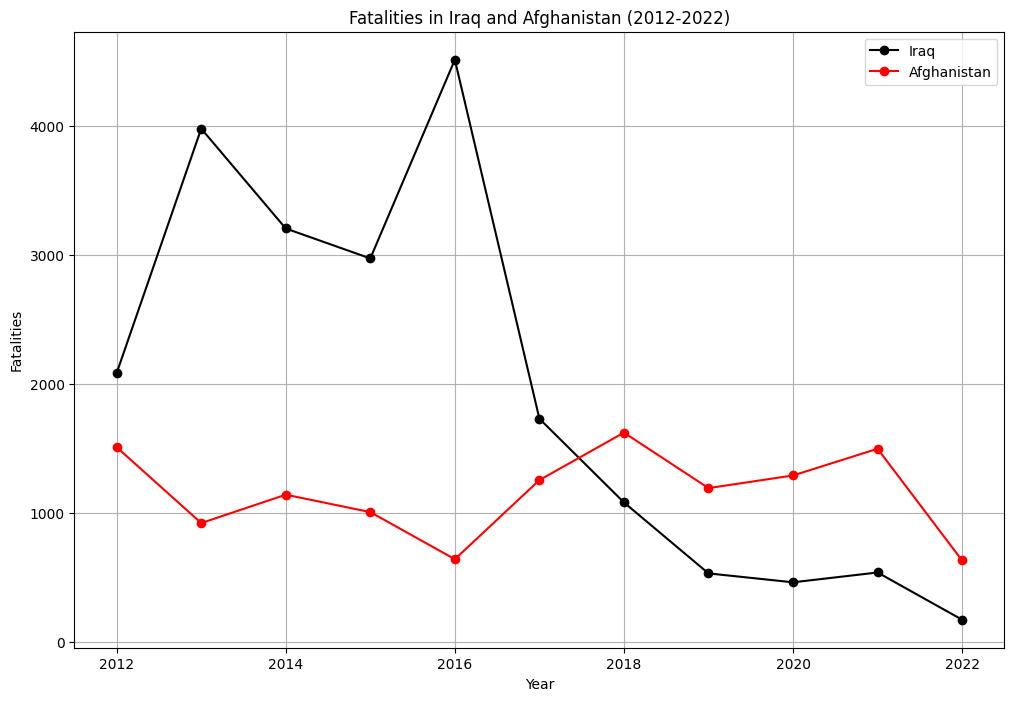

In [42]:
iraq_data = df[df['Country'] == 'Iraq']
afghanistan_data = df[df['Country'] == 'Afghanistan']

plt.figure(figsize=(12, 8))
plt.plot(iraq_data['Year'], iraq_data['Fatalities'], label='Iraq', marker='o', linestyle='-', color='black')
plt.plot(afghanistan_data['Year'], afghanistan_data['Fatalities'], label='Afghanistan', marker='o', linestyle='-', color='red')

plt.title('Fatalities in Iraq and Afghanistan (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
total_incidents_by_country.head()

,Country,Incidents
0,Afghanistan,4443
1,Albania,0
2,Algeria,111
3,Angola,3
4,Argentina,35


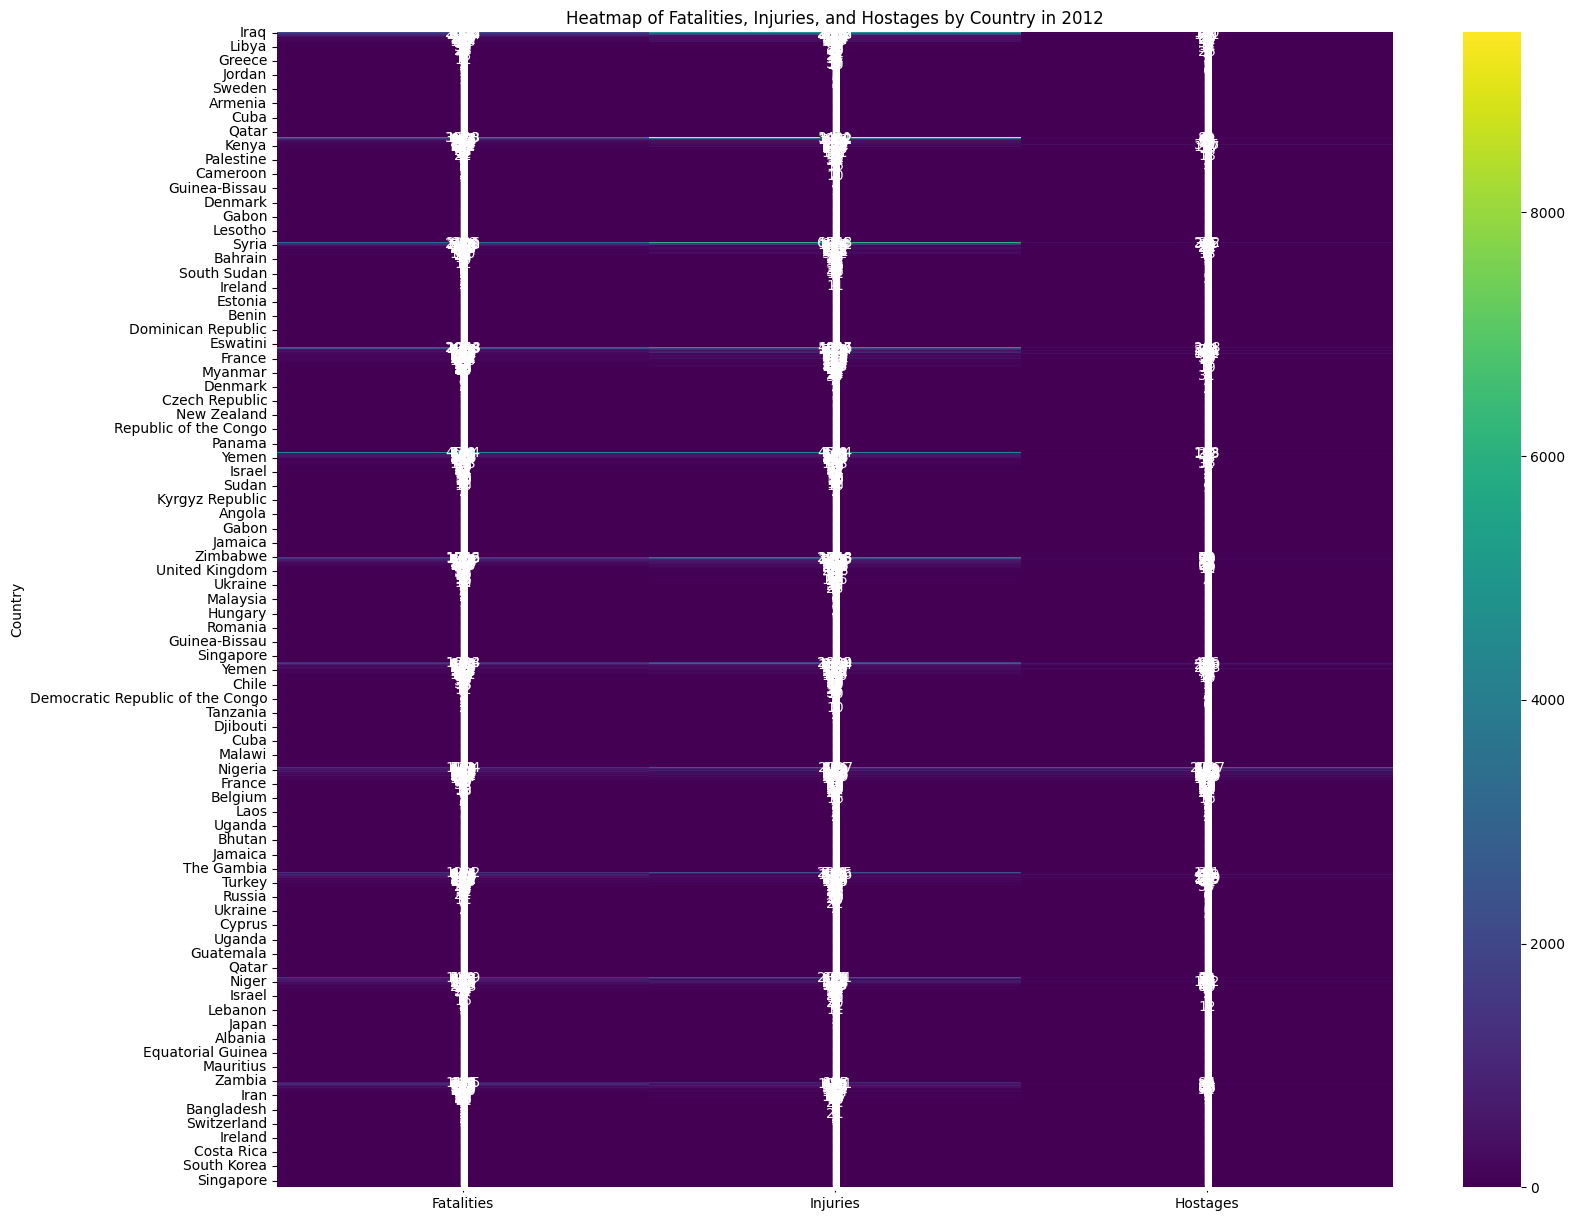

In [44]:
df.set_index('Country', inplace=True)

heatmap_data = df[['Fatalities', 'Injuries', 'Hostages']]

plt.figure(figsize=(18, 15))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='g')
plt.title('Heatmap of Fatalities, Injuries, and Hostages by Country in 2012')
plt.show()

In [45]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [46]:
import folium
from folium.plugins import MarkerCluster

data = {
    'Country': ['Iraq', 'Pakistan', 'Afghanistan', 'Syria', 'Yemen'],
    'Incidents': [1288, 638, 507, 168, 219],
    'Latitude': [33.223191, 30.375321, 33.93911, 34.802075, 15.552727],
    'Longitude': [43.679291, 69.345116, 67.709953, 38.996815, 48.516388]
}

df = pd.DataFrame(data)
world_map = folium.Map(location=[20, 0], zoom_start=2)

for _, row in df.iterrows():
    folium.Circle(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Incidents'] * 10,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        popup=f"{row['Country']}: {row['Incidents']} incidents"
    ).add_to(world_map)

world_map

In [47]:
df = pd.read_excel("/kaggle/input/global-terrorism-index-2023/Global Terrorism Index 2023.xlsx")

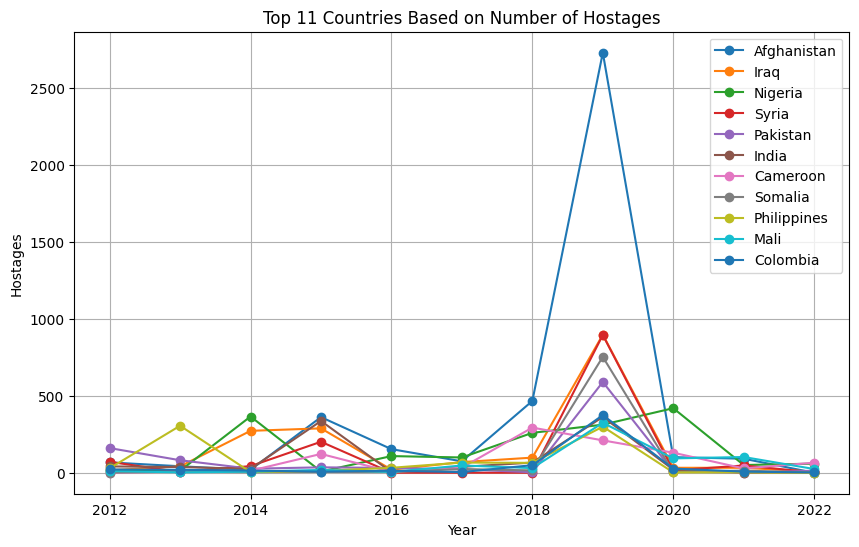

In [48]:
top_country_name = df.groupby(['Country'])['Hostages'].sum().reset_index().sort_values(by='Hostages', ascending=False).head(11)

top = df.groupby(['Country','Year'])['Hostages'].sum().reset_index()

plt.figure(figsize=(10, 6))

for x in top_country_name['Country']:
    data = top[top['Country']==x]
    plt.plot(data['Year'], data['Hostages'], marker='o',label=x) 

plt.xlabel('Year')
plt.ylabel('Hostages')
plt.title('Top 11 Countries Based on Number of Hostages')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
score_bins = [-1,5,9]
score_labels = ['More Safe', 'Less Safe']

df['Category_1'] = pd.cut(df['Score'], bins=score_bins, labels=score_labels, right=False)

In [50]:
score_bins = [0, 1, 2, 3, 4, 5, 6, 7, 8,9]
score_labels = ["Very Secure Countries",
    "Secure Countries",
    "Relatively Secure Countries",
    "Moderate Security Countries",
    "Developing Security Countries",
    "Challenged Security Countries",
    "Unstable Security Countries",
    "Very Insecure Countries",
    "Highly Insecure Countries"]

In [51]:
df['Category_2'] = pd.cut(df['Score'], bins=score_bins, labels=score_labels, right=False)

In [52]:
country_2022 = df[df['Year']==2022]

In [53]:
country_2022.head()

,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year,Category_1,Category_2
1630,AFG,Afghanistan,1,8.822244,225,633,897,0,2022,Less Safe,Highly Insecure Countries
1631,BFA,Burkina Faso,2,8.564101,310,1135,496,84,2022,Less Safe,Highly Insecure Countries
1632,SOM,Somalia,3,8.463031,299,755,1001,0,2022,Less Safe,Highly Insecure Countries
1633,MLI,Mali,4,8.412392,272,944,376,24,2022,Less Safe,Highly Insecure Countries
1634,SYR,Syria,5,8.161243,197,447,451,2,2022,Less Safe,Highly Insecure Countries


In [54]:
import plotly.express as px
fig = px.sunburst(country_2022, path=['Category_1','Category_2','Country'], values='Score')
fig.update_layout(margin = dict(t=15, l=15, r=15, b=15))
fig.show()